In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

In [5]:
class DataGen:
    def __init__(self, dim = 10):
        w = np.random.random(dim) - 0.5 # 1 by 10 array;random floats in [0.0, 1.0)
        w = w / la.norm(w) # normalize the weight 
        self.dim = dim
        self.w = w
        
    def gen_data(self, n_data = 10000):
        x_data = 25 * (np.random.random([self.dim, n_data]) - 0.5) #dim by n_data matrix 10 by 10000
        # every column is a data point
        y_data = np.sign(self.w @ x_data) #10000 y to the x data points (-1,0,1)
        return x_data, y_data 
    
    #since np.sign may yield -1, 0 ,1 ==> need to filter out 0
    def filter_data(self,x,y):
        g_idx = (y * (self.w@x)) >= 1
        return x[:,g_idx], y[g_idx]
    
    #combine gen_data and filter_data
    def gen_marg_data (self, n_data = 10000):
        x,y = self.gen_data(n_data = n_data)
        xf, yf = self.filter_data(x,y)
        return xf, yf
    
    def get_truth(self):
        return self.w

In [55]:
w = [1,2,3]
la.norm(w)

3.7416573867739413

3.7416573867739413

In [6]:
d = DataGen()

In [8]:
x,y = d.gen_marg_data()

In [9]:
x.shape

(10, 8927)

In [11]:
dim = 10
w = np.random.random(dim) - 0.5
print('w is', w)
w = w/la.norm(w)
print('normalized w ', w)

w is [-0.19328209  0.03894629  0.44702374 -0.23871153  0.23715728  0.00342309
 -0.45430695  0.08585672 -0.22878486  0.25935173]
normalized w  [-0.2334782   0.04704579  0.53998949 -0.28835542  0.28647794  0.00413497
 -0.54878736  0.103712   -0.27636434  0.31328808]


In [25]:
print('X shape is',x.shape)
b_idx = (y * (w @x)) < 0 #True False vector
print('b_idx', b_idx)
b_num = sum(b_idx)
print('b_num is ', b_num)

X shape is (10, 8927)
b_idx [ True  True  True ... False  True  True]
b_num is  5823


In [19]:
x_b = x[b_id]
y_b = y[b_id]
n = b_num

j = 0

-23.735658753953068

In [27]:
np.random.randint(3)

2

In [41]:
class Perceptron:
    def __init__(self, dim = 10):
        w = np.random.random(dim) - 0.5
        w/la.norm(w)
        self.w = w
        self.dim = dim
        
    def get_wrongs(self, x_data, y_data):
        b_idx = (y_data * (self.w@x_data)) < 0
        b_num = sum(b_idx)
        return b_num, x_data[:, b_idx], y_data[b_idx]
    
    def fit_w(self, x_data, y_data, printing = False):
        n, xb, yb = self.get_wrongs(x_data, y_data)
        
        j = 0
        while n > 0:
            idx = np.random.randint(n)
            w = self.w + yb[idx] * xb[:,idx]
            self.w = w
            n, xb, yb = self.get_wrongs(x_data, y_data)
            
            if printing:
                if j%25 == 0:
                    print("iteration: %d, and wrongs %d" %(j,n))
            bound = (la.norm(self.w) * la.norm(x_data,axis = 0).max())**2
            j = j + 1
            
        return j, bound
    
    def eval_w(self, x_test, y_test):
        n, _, _ = self.get_wrongs(x_test,y_test)
        return 1.0 - float(n/x_test.shape[1])
            

In [42]:
p = Perceptron()

In [43]:
p.fit_w(x,y,printing = True)

iteration: 0, and wrongs 2785
iteration: 25, and wrongs 321
iteration: 50, and wrongs 46
iteration: 75, and wrongs 53
iteration: 100, and wrongs 28


(112, 57662310.04941396)

In [44]:
def plot_2D(n = 1000,show = True):
    plt.clf()
    dg2 = DataGen(dim = 2)
    x,y = dg2.gen_data(n_data = n)
    xf,yf = dg2.filter_data(x,y)
    p_idx = y > 0 
    p_idx_fil = yf > 0
    plt.plot(x[0,p_idx],x[1,p_idx],'.',label = 'y>0')
    plt.plot(x[0,~p_idx],x[1,~p_idx],'.',label = 'y<0')
    plt.plot(xf[0,p_idx_fil],xf[1,p_idx_fil],'.',label = 'y>0 margin')
    plt.plot(xf[0,~p_idx_fil],xf[1,~p_idx_fil],'.',label = 'y<0 margin')
    plt.legend()
    if show:
        plt.show()

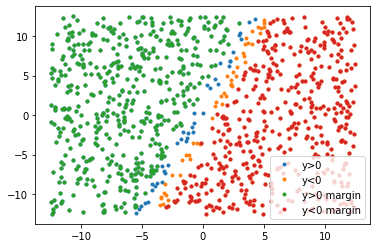

In [45]:
plot_2D(n = 1000,show = True)

In [50]:
def one_run(n = 10000, dim =10):
    dg = DataGen(dim = dim)
    x,y = dg.gen_marg_data(n_data = n)
    x_test,y_test = dg.gen_data(n_data = n)
    perceptron = Perceptron(dim = dim)
    pre_tr_acc = perceptron.eval_w(x_test,y_test)
    perceptron.fit_w(x,y)
    post_tr_acc = perceptron.eval_w(x_test,y_test)
    print(f"pre and post train accuracies: {pre_tr_acc:.3f} and {post_tr_acc:.3f}")

In [52]:
one_run()

pre and post train accuracies: 0.498 and 0.988


In [53]:
def many_runs(n =50000, dims =np.linspace(2,30,15).astype(int)):
    data = np.zeros([4,dims.shape[0]])
    j = 0 
    for dim in dims:
        dg = DataGen(dim = dim)
        x,y = dg.gen_marg_data(n_data = n)
        assert x.shape[1]>0, "not enough data!"
        xt,yt = dg.gen_data(n_data = n)
        perceptron = Perceptron(dim = dim)
        n_steps,upper_bound = perceptron.fit_w(x,y,printing = False) 
        accuracy = perceptron.eval_w(xt,yt)
        data[:,j] = np.array([dim,n_steps,upper_bound,accuracy])
        j+=1
    plt.figure(1)
    plt.plot(data[0,:],data[3,:],'-.')
    plt.xlabel('dimension')
    plt.ylabel('accuracy')
    plt.figure(2)
    plt.plot(data[0,:],data[1,:],'-.',label = 'steps to convergence')
    plt.legend()
    plt.xlabel('dimension')
    plt.ylabel('number of steps')
    plt.show()

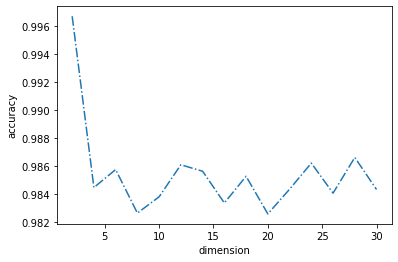

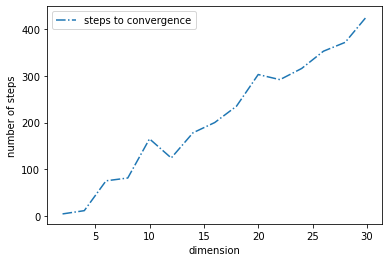

In [54]:
many_runs()